#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import model_utils
from importlib import reload

In [50]:
plt.style.use('./styles.txt')

#### Index

# Introduction

## Data Loading

In [2]:
df_1 = pd.read_pickle('sample_data/30k_engineered.pkl')
df_2 = pd.read_pickle('sample_data/large_fires_cleaned.pkl')

In [3]:
df_1.head()

,DATE,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
0,1992-01-01,1992,1,0.10,A,43.325000,-101.018500,SD,5.257143,-2.928571,...,0.000000,0.00,5.399184,3.5,47.062041,-1.8,1889.074286,-48.6,28.913469,-4.3
1,1992-01-01,1992,1,1.00,B,33.058333,-79.979167,SC,13.700000,9.885714,...,55.589796,-4.40,7.196327,0.1,5.575510,2.0,15648.559592,-14.9,19.071020,2.4
2,1992-01-02,1992,2,0.25,A,40.775000,-74.854160,NJ,6.385714,1.585714,...,9.546510,0.00,19.731020,4.0,34.516735,-10.6,16492.948163,-254.6,75.711429,-0.9
3,1992-01-03,1992,3,1.91,B,31.018500,-83.297300,GA,14.457143,11.828571,...,59.321224,-9.70,9.142041,-4.1,11.228571,0.2,16679.204898,223.6,21.585306,-8.4
4,1992-01-03,1992,3,2.00,B,30.728900,-87.238100,FL,14.428571,10.985714,...,0.213355,-1.32,10.262857,-7.9,27.382857,6.7,19587.093469,-24.8,13.107755,-2.7


In [4]:
df_2.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,avg_humidity,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
0,2003,104,232.0,D,41.363889,-88.173056,IL,14.057143,8.014286,54.885714,...,0.000000,0.00,7.864898,5.5,31.552653,11.3,4393.119592,160.9,16.827755,-9.5
1,1992,52,150.0,D,34.587299,-95.611298,OK,18.571429,11.485714,53.085714,...,0.000000,0.00,5.124898,-3.0,12.656327,3.6,5591.173469,-160.7,28.450612,6.2
2,2010,166,277.0,D,27.001200,-81.436200,FL,33.828571,27.514286,75.757143,...,0.556367,0.25,1.770612,2.8,8.504082,-4.2,6388.276735,-65.9,0.568163,-0.6
3,1992,120,125.0,D,45.966667,-68.466668,ME,8.757143,3.514286,62.514286,...,0.000000,0.00,12.290612,-7.2,17.136735,12.9,4668.631429,141.8,4.495510,-2.9
4,2011,71,285.0,D,36.279960,-93.945460,AR,13.471429,7.214286,64.271429,...,0.188278,0.00,12.262041,3.8,45.435510,2.2,8314.153878,-39.5,24.979184,-6.0


In [5]:
# Check that the shapes match
df_1.shape[1] == df_2.shape[1] 

False

In [6]:
# Drop index column
df_1.drop('DATE', axis=1, inplace=True)

# Check that the shapes match
df_1.shape[1] == df_2.shape[1] 

True

In [28]:
df = pd.concat([df_1, df_2])
df.shape

(29734, 34)

In [29]:
# Check that they were added
df.shape[0] == df_1.shape[0] + df_2.shape[0]

True

In [30]:
df.reset_index(drop=True, inplace=True)
df.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,avg_tempmax,avg_temp,avg_humidity,...,precip_variance,precip_delta,dew_variance,dew_delta,windspeed_variance,windspeed_delta,winddir_variance,winddir_delta,pressure_variance,pressure_delta
0,1992,1,0.10,A,43.325000,-101.018500,SD,5.257143,-2.928571,81.142857,...,0.000000,0.00,5.399184,3.5,47.062041,-1.8,1889.074286,-48.6,28.913469,-4.3
1,1992,1,1.00,B,33.058333,-79.979167,SC,13.700000,9.885714,81.428571,...,55.589796,-4.40,7.196327,0.1,5.575510,2.0,15648.559592,-14.9,19.071020,2.4
2,1992,2,0.25,A,40.775000,-74.854160,NJ,6.385714,1.585714,67.185714,...,9.546510,0.00,19.731020,4.0,34.516735,-10.6,16492.948163,-254.6,75.711429,-0.9
3,1992,3,1.91,B,31.018500,-83.297300,GA,14.457143,11.828571,78.957143,...,59.321224,-9.70,9.142041,-4.1,11.228571,0.2,16679.204898,223.6,21.585306,-8.4
4,1992,3,2.00,B,30.728900,-87.238100,FL,14.428571,10.985714,79.971429,...,0.213355,-1.32,10.262857,-7.9,27.382857,6.7,19587.093469,-24.8,13.107755,-2.7


## Preprocessing

Although we are loading in a larger DataFrame, the preprocessing stages are the same as previously. For the categorical features, namely `STATE` and `FIRE_SIZE_CLASS`, only '`STATE` will be binarised into dummy variables. For the numeric columns, columns that measured the variance for the weather features will be transformed using a BoxCox transformation.

In [31]:
# Categorical preprocessing
df = utils.BasicCategoricalPreprocessing(df)

In [32]:
# Check the output
df.head(2)

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,avg_tempmax,avg_temp,avg_humidity,avg_precip,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1992,1,0.1,A,43.325000,-101.018500,5.257143,-2.928571,81.142857,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,1992,1,1.0,B,33.058333,-79.979167,13.700000,9.885714,81.428571,4.185714,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Numeric preprocessing
df, boxcox_cols = utils.BasicNumericPreprocessing(df)

utils.HistogramSubplots(df[boxcox_cols])

### `FIRE_SIZE_CLASS` Distribution

One of the biggest problems that we experienced in the building of the initial regression and classification models was that we did not have enough observations of larger fires, in fact, only 0.1% of the observations in the previous data pertained to `FIRE_SIZE_CLASS` G. Let us see how the distribution differs this time.

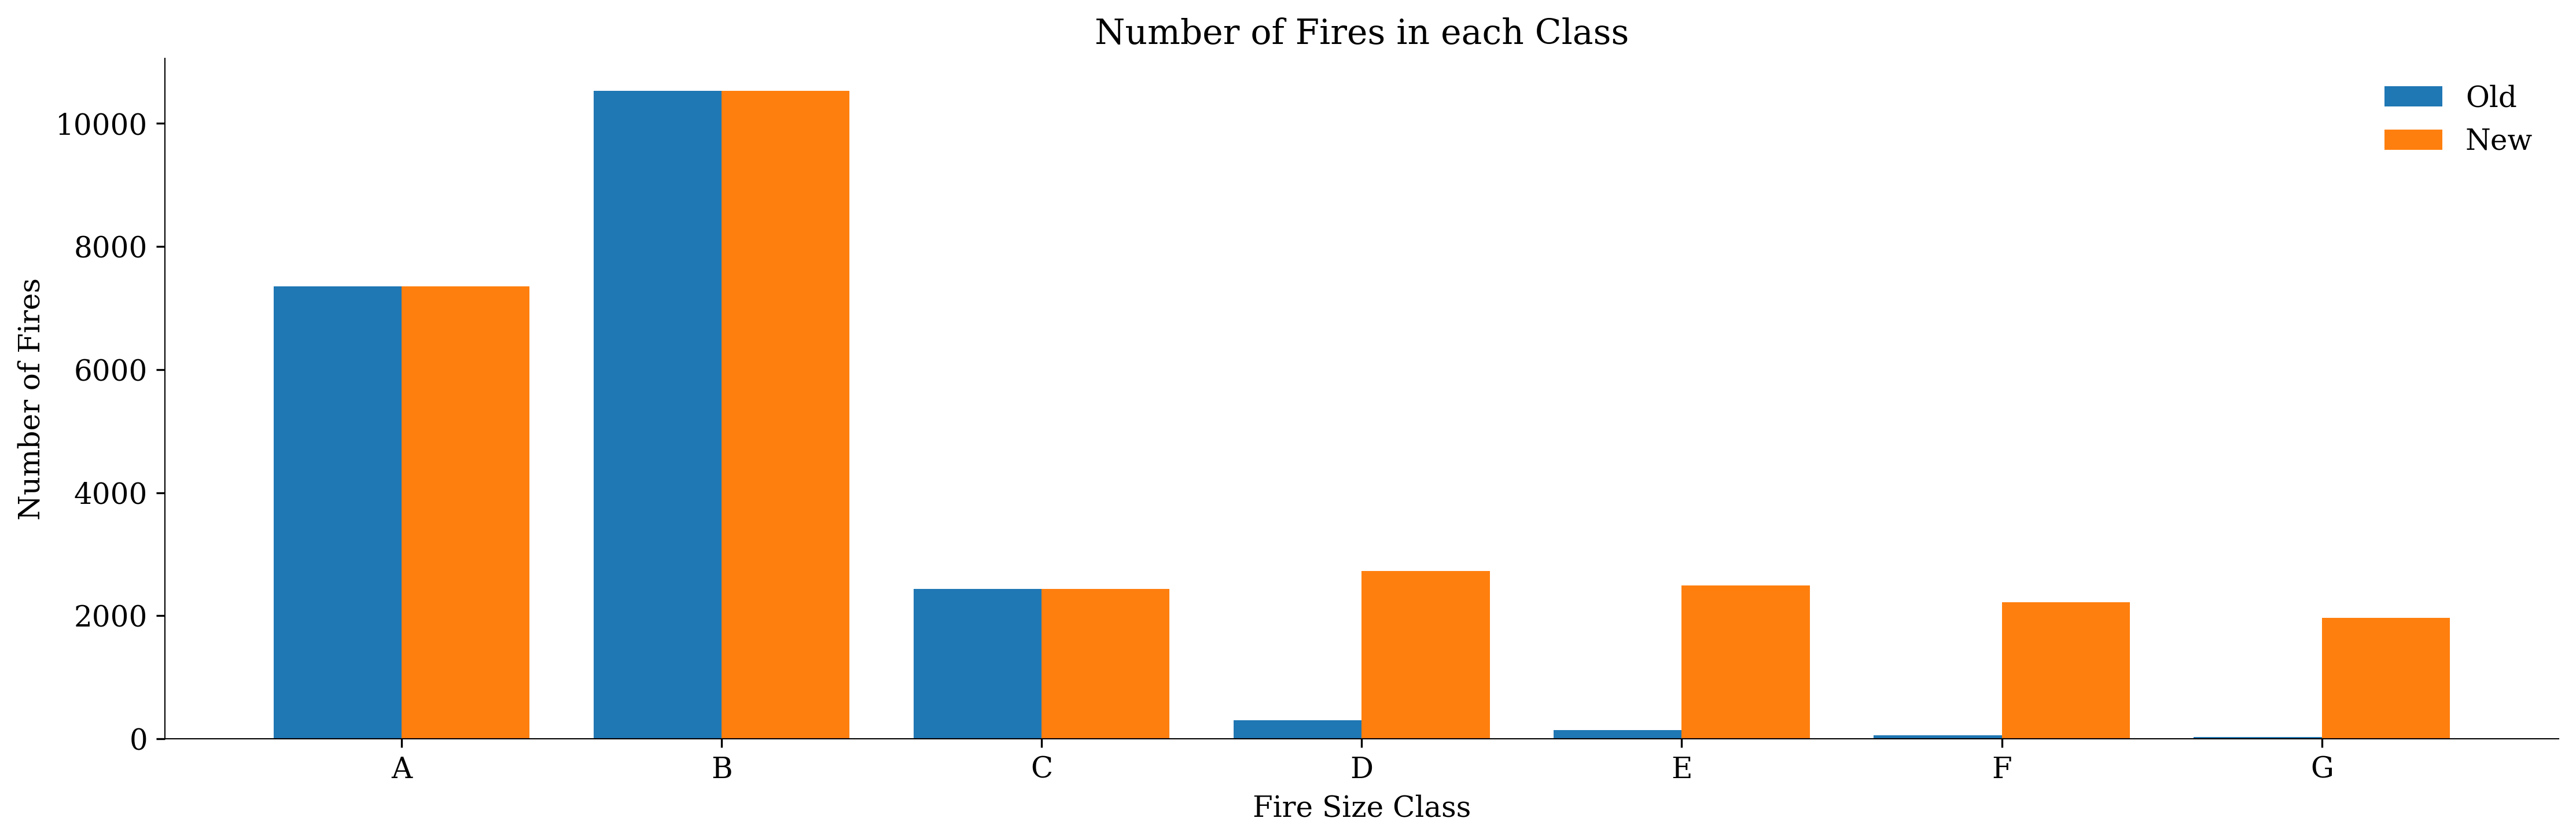

In [54]:
# Create DataFrame for the values
old = utils.count_percentage_df(df_1['FIRE_SIZE_CLASS']).sort_index()
new = utils.count_percentage_df(df['FIRE_SIZE_CLASS']).sort_index()

# Change the 
comparison = pd.DataFrame()

for name, temp_df in zip(['old', 'new'], [old, new]):
    for col in ['Count']:
        col_name = f'{name}'
        comparison[col_name] = temp_df[col]

X = comparison.index
old_count = comparison['old']
new_count = comparison['new']
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))
plt.bar(X_axis - 0.2, old_count, 0.4, label = 'Old')
plt.bar(X_axis + 0.2, new_count, 0.4, label = 'New')
plt.xlabel("Fire Size Class")
plt.ylabel("Number of Fires")
plt.title("Number of Fires in each Class")
plt.xticks(X_axis, X)
plt.legend()
plt.show()

We see then that there are significantly more fires from the minority classes, however these are still underrepresented in comparison to classes A and B. Regardless, we will begin by creating a baseline model.

## Modelling

### Baseline Model

Previously, we created a baseline model, however certain classes were underrepresented. By increasing the number...

In [56]:
reload(model_utils);

# Get predictors and target
X = df.drop(['FIRE_SIZE', 'FIRE_SIZE_CLASS'], axis=1)
y = df['FIRE_SIZE']

# Create column transformer
column_transformer = model_utils.CreateColumnTransformer(X)

In [59]:
X.shape

(29734, 83)

In [60]:
from sklearn.model_selection import train_test_split

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the column transformer
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression

# Instantiate model
base_linreg = LinearRegression()

# Fit model
base_linreg.fit(X_train_transformed, y_train)

# Score model
print(f"R-squared: {base_linreg.score(X_test_transformed, y_test)}")

R-squared: 0.07046651118799652


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = base_linreg.predict(X_test_transformed)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred)}')

MAE: 3047.137327557674
RMSE: 229468614.97858346


Immediately we see that the performance of this model has increased and is no longer returning a negative $R^2$ value. We can now try to improve the model by using some form of feature selection.

### Feature Selection

Before we take a look at the features, let us see the coefficients for the variables at the moment.

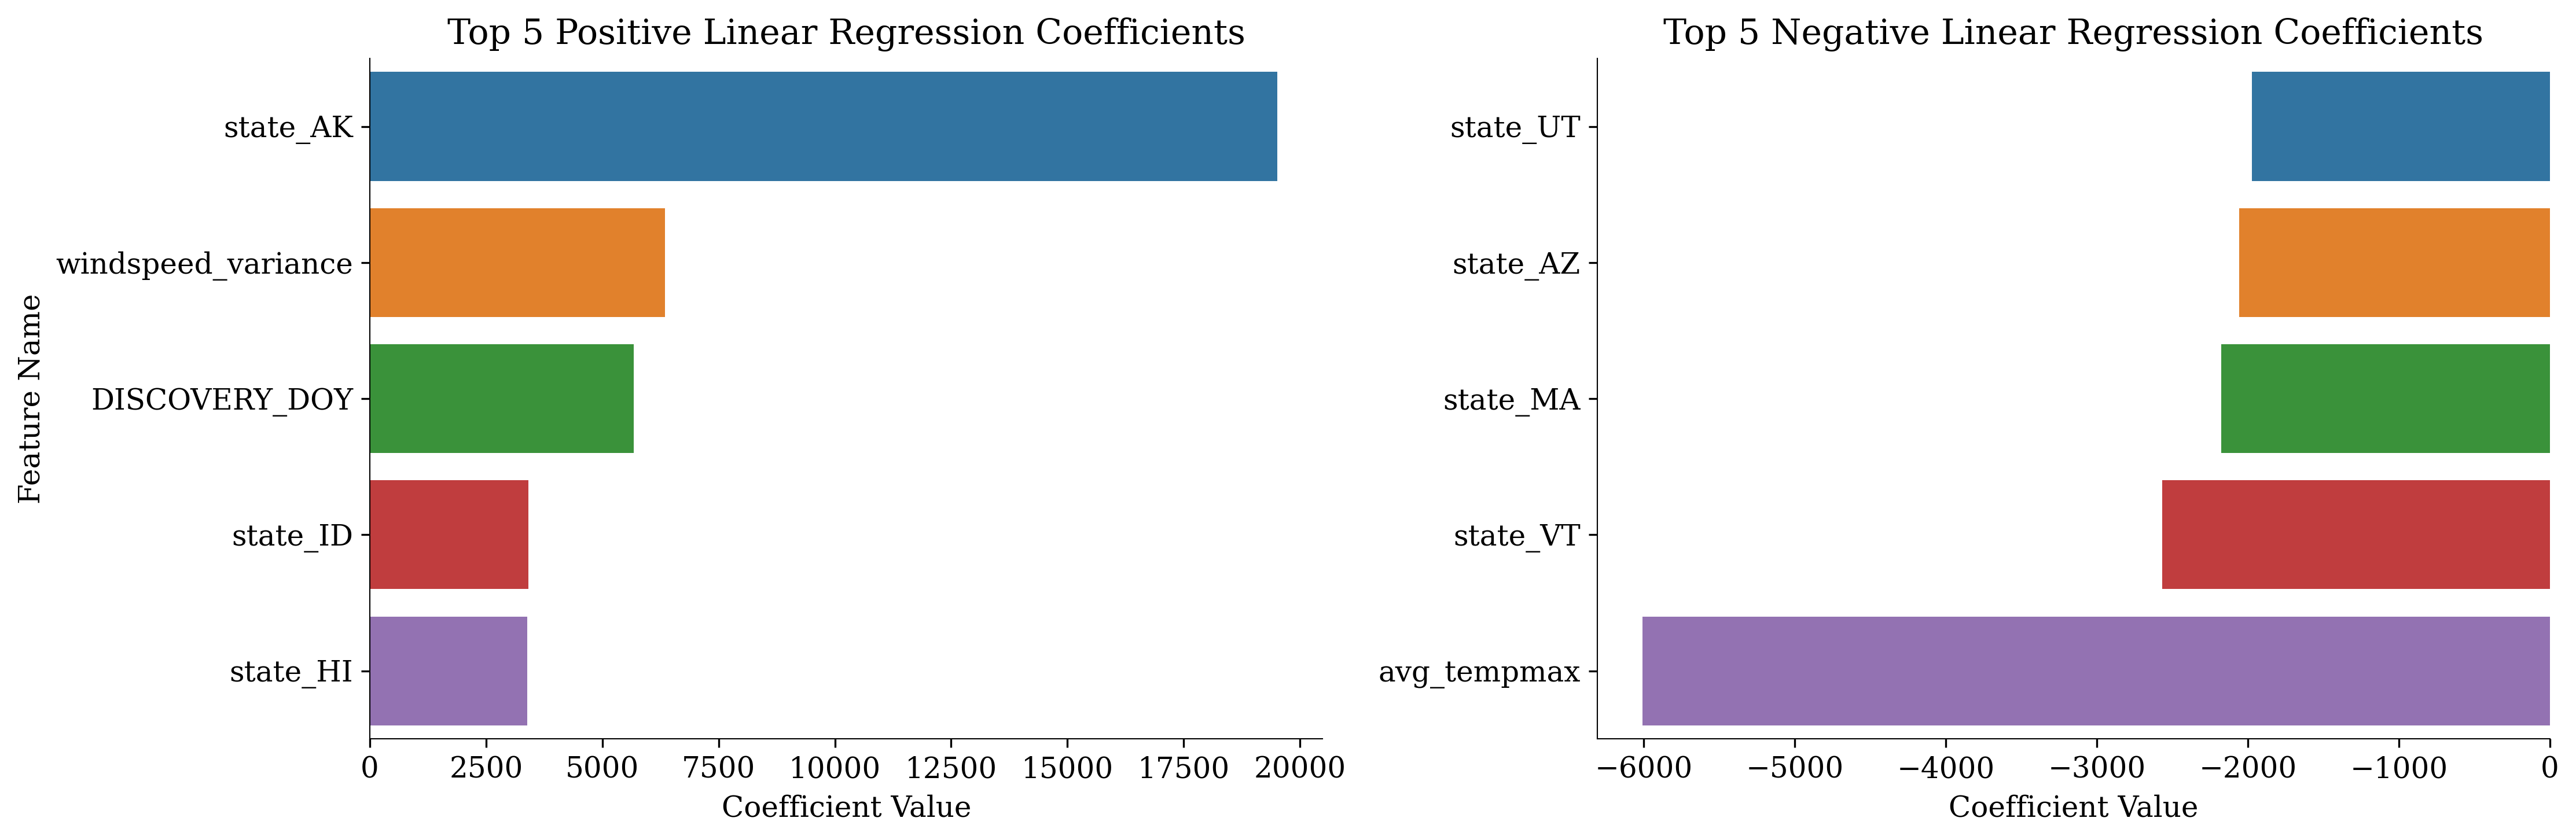

In [65]:
model_utils.PlotCoefficients(base_linreg, X)

We see that from this plot, the largest and smallest coefficients have changed to the ones that we previously generated. While previously `windspeed_variance` had the largst positive coefficient, it is the fact that a fire is in Alaska that determines the size of the wildfire. Again, this seems to lead us to the conclusion that we reached earlier. Interestingly, the coefficient with the smallest values is `avg_tempmax`, although this is surprising, considering that warmer temperatures leading up to a fire should provide the optimal environment for a wildfire to grow. Let us begin our feature engineering by reducing the multicollinearity of the model. As before, we can use Lasso Regression to determine which are the most important features

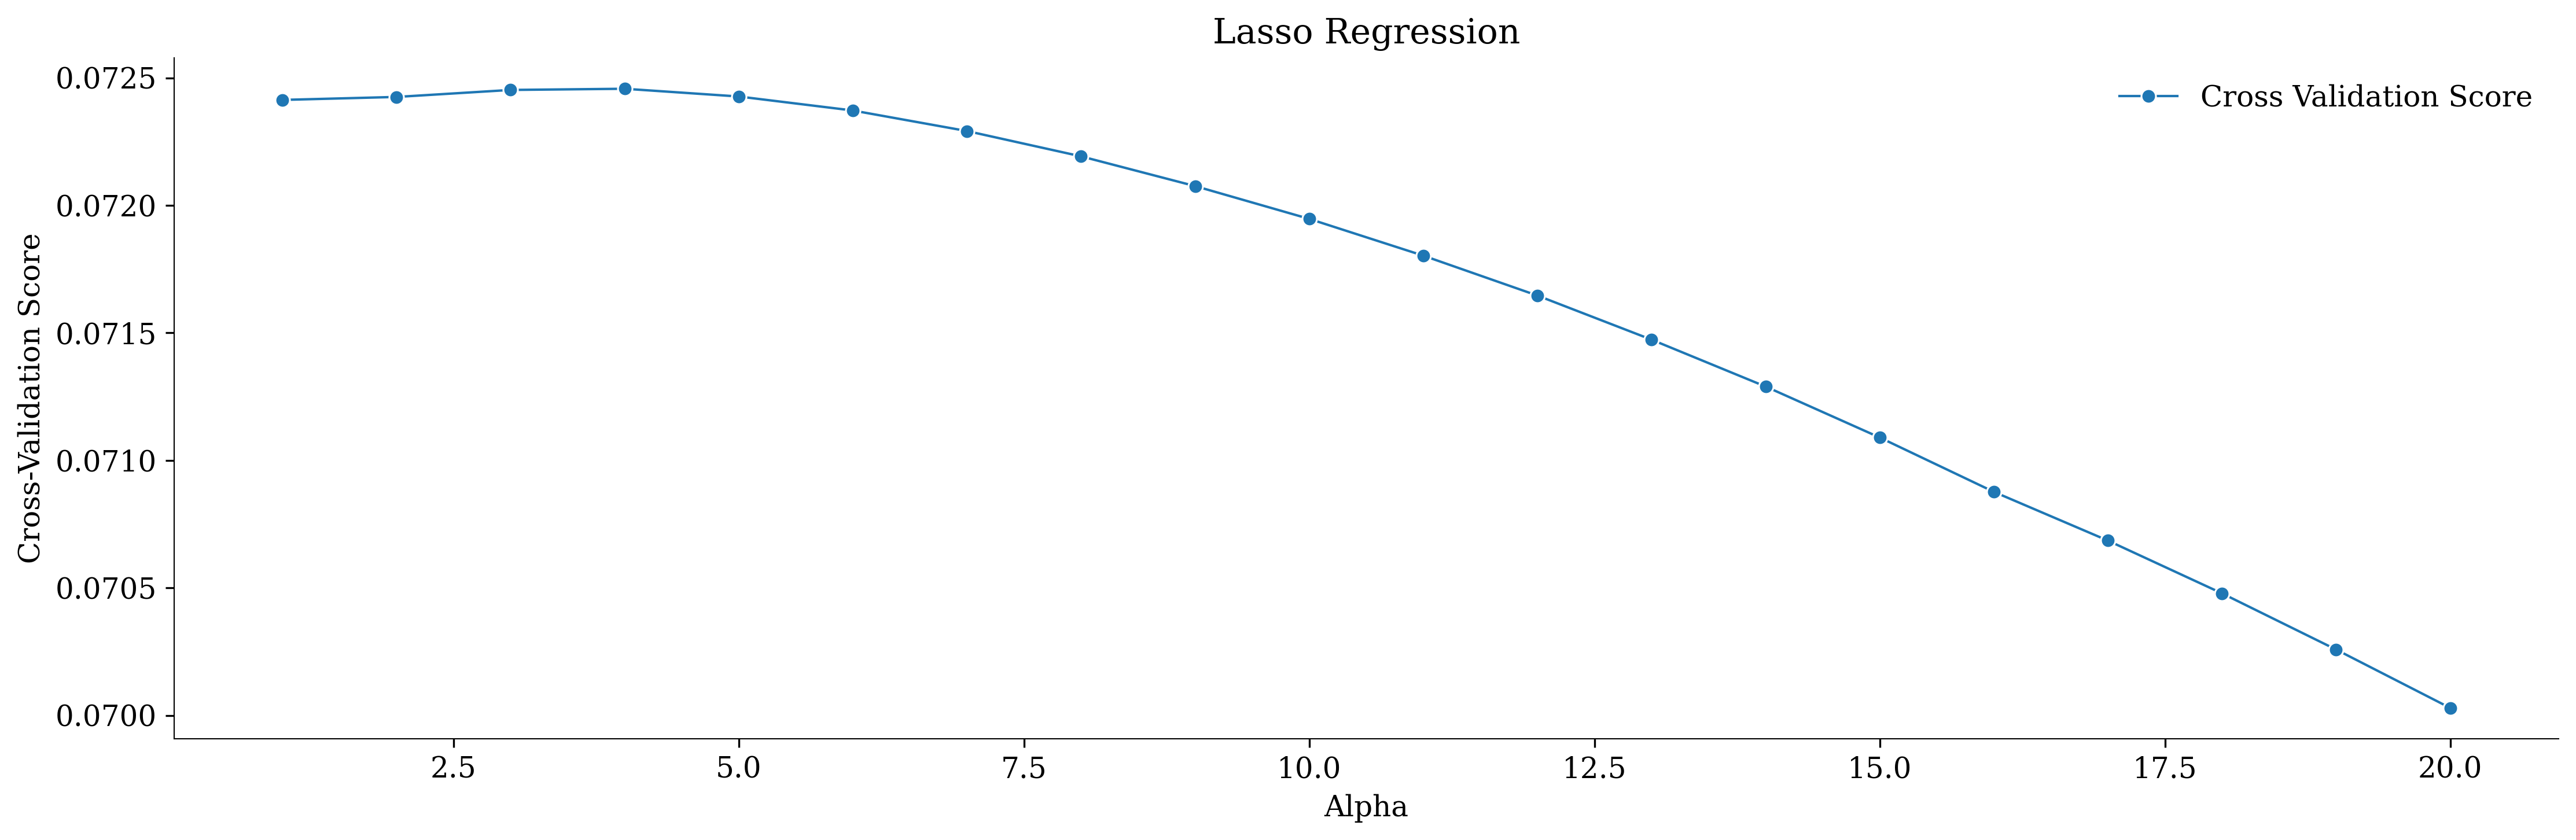

In [82]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

alphas = np.linspace(1, 20, 20)

cross_val_scores = []

for alpha in alphas:
    print(f'Fitting model {alpha}', end='\r')
    lasso = Lasso(alpha=alpha)
    cv_score = np.mean(cross_val_score(lasso, X_train_transformed, y_train, cv = 2))
    cross_val_scores.append(cv_score)
    
plt.figure(figsize=(15, 5))
plt.title('Lasso Regression')
sns.lineplot(x=alphas, y=cross_val_scores, marker='o', label='Cross Validation Score')
plt.xlabel('Alpha')
plt.ylabel('Cross-Validation Score')
plt.show()

Interestingly, we see that the accuracy of the model decreases as the alpha value increases. Let us take a look at the coefficients of the final lasso model created.

In [88]:
lasso = Lasso(alpha=20)
lasso.fit(X_train_transformed, y_train)

Lasso(alpha=20)

In [89]:
lasso_df = pd.DataFrame({'Coefficient Value':lasso.coef_}, index=X.columns)

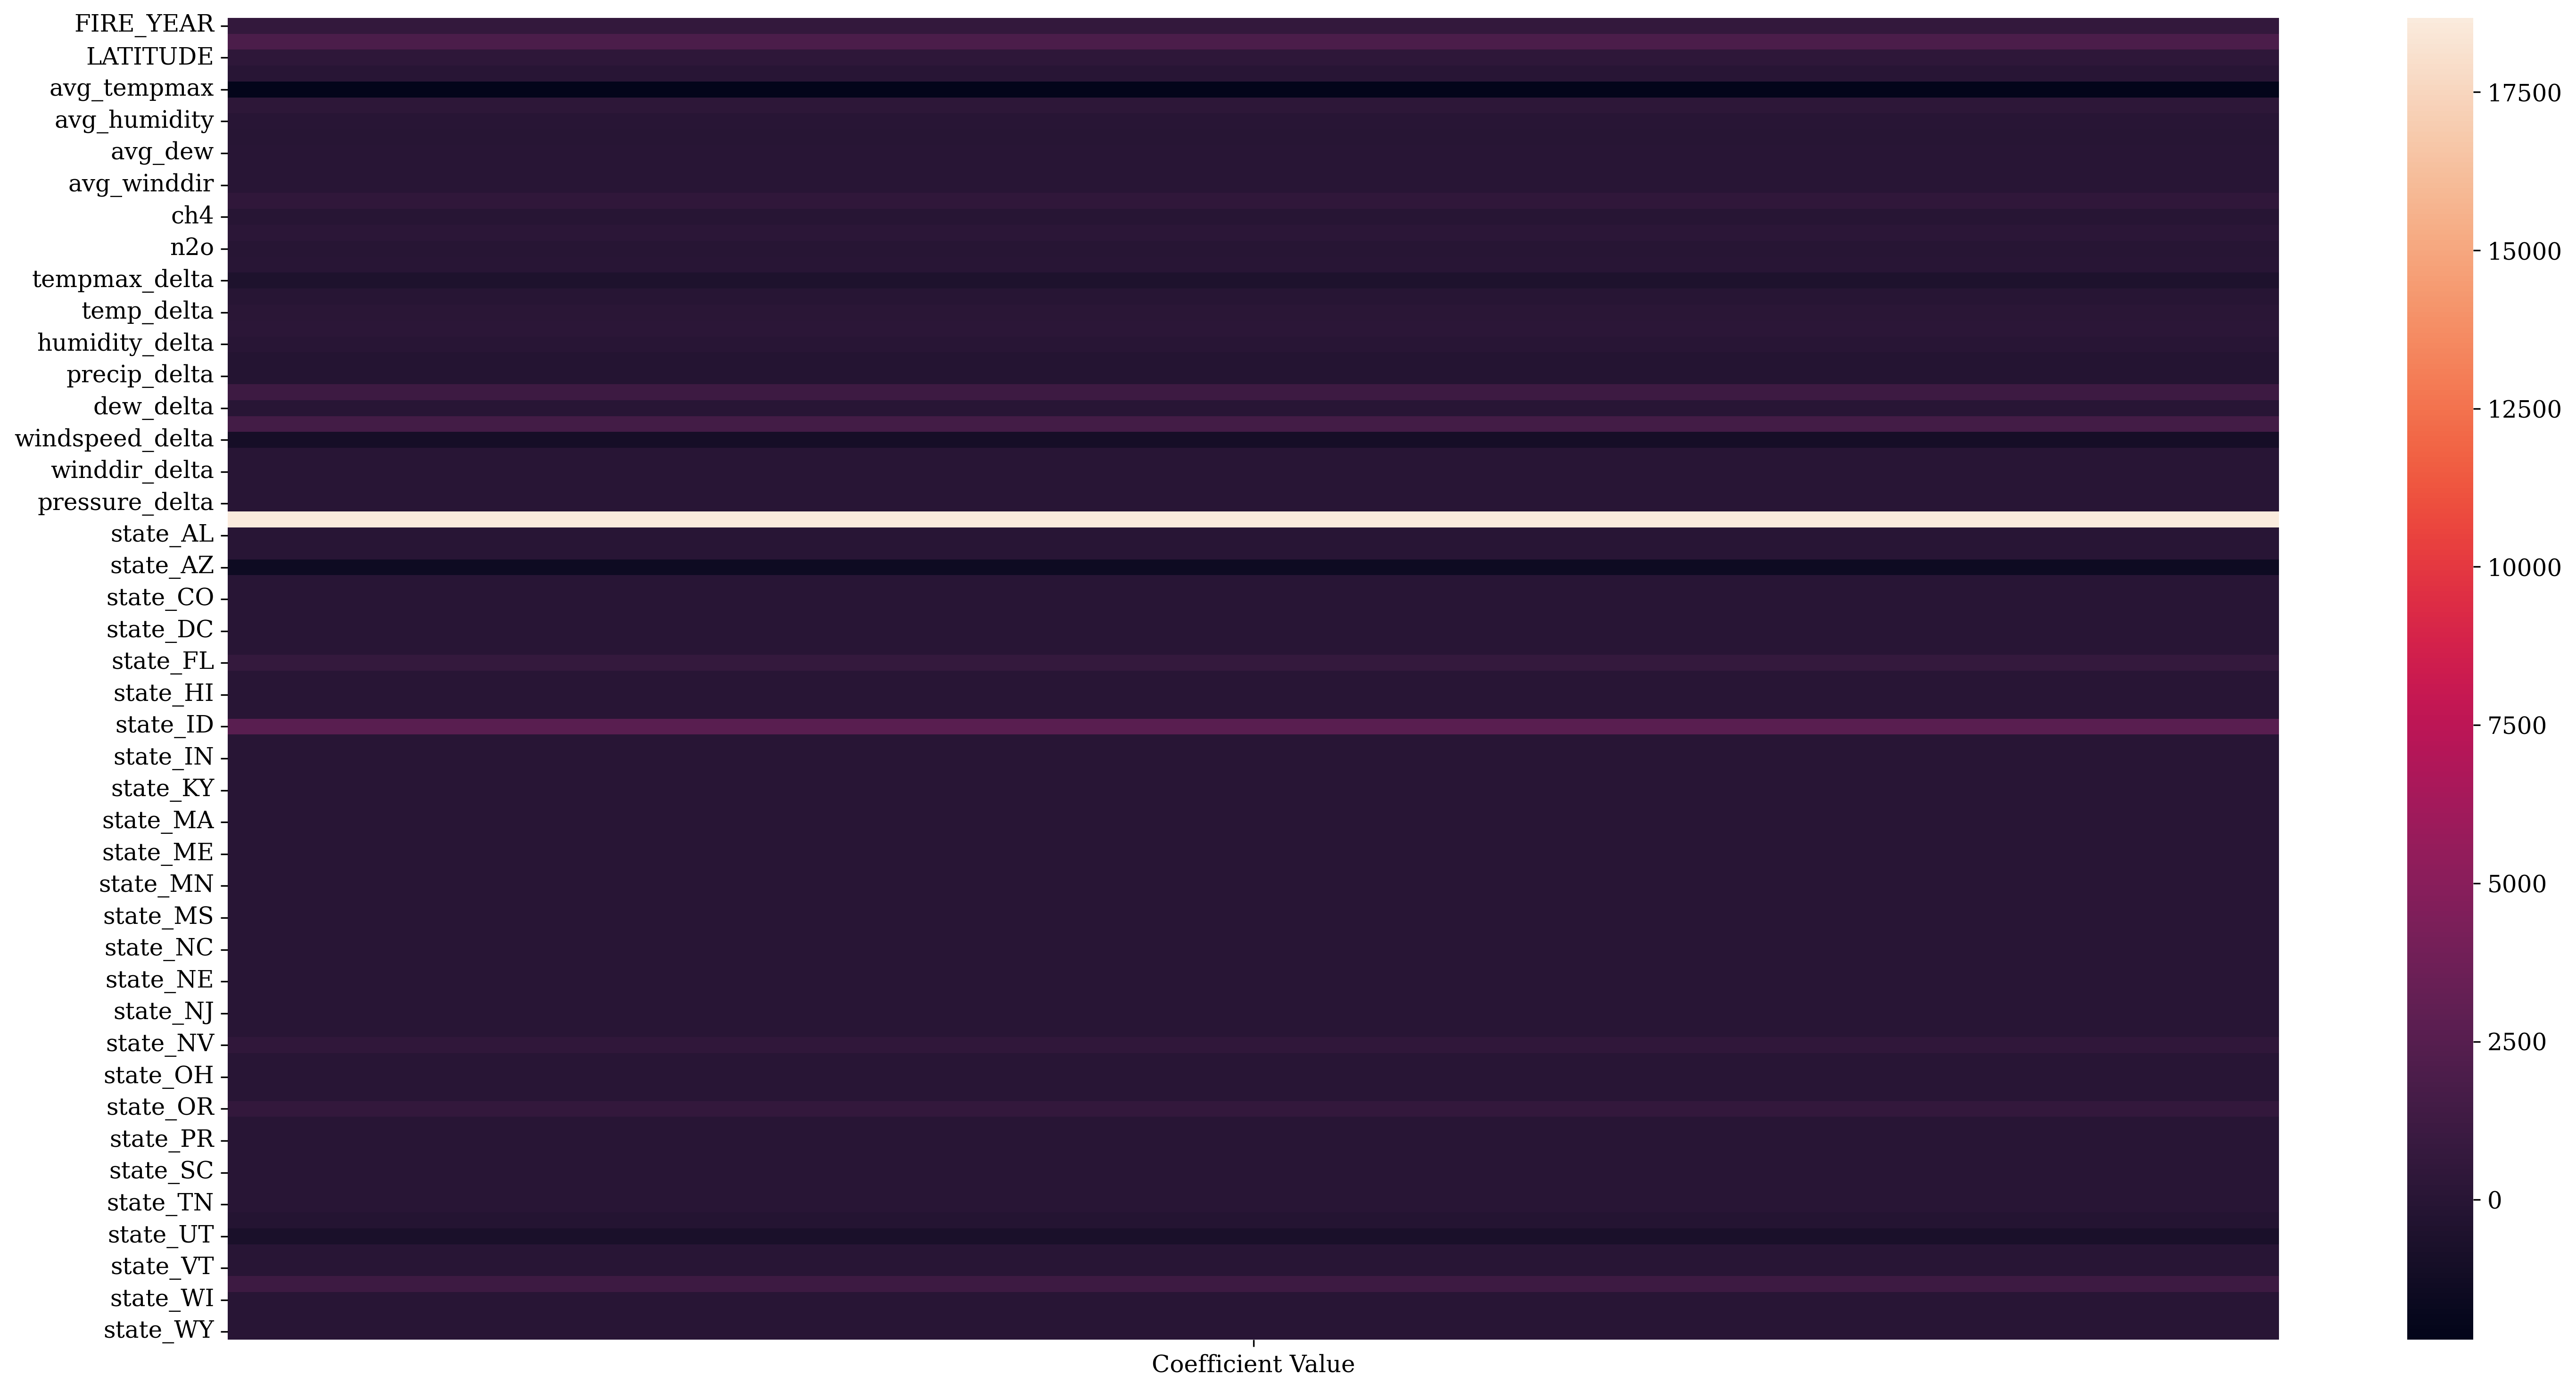

In [92]:
plt.figure(figsize=(20, 10))
sns.heatmap(lasso_df)
plt.show()

While fundamentally not much has changed - Alaska is still the most important feature - we see that there are more featurese which contribute to the model at a higher alpha value. How would a model perform that took the features deemed most influential by the original model? We will take the top and bottom 5 coefficients, using these as the only features in the model to see how this performs.

In [125]:
base_linreg_df = pd.DataFrame({'coef': base_linreg.coef_}, index=X.columns)\
    .sort_values(by='coef', ascending=False)
top_5_features = base_linreg_df.index.values[:5]

bottom_5_features = base_linreg_df.index.values[-5:]
features = np.append(top_5_features, bottom_5_features)
features

array(['state_AK', 'windspeed_variance', 'DISCOVERY_DOY', 'state_ID',
       'state_HI', 'state_UT', 'state_AZ', 'state_MA', 'state_VT',
       'avg_tempmax'], dtype=object)

In [126]:
X_train, X_test, y_train, y_test = \
train_test_split(X[features], y, test_size=0.2, random_state=1)

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

ss_col = ['windspeed_variance', 'avg_tempmax']
mm_col = ['DISCOVERY_DOY']

col_transforms = [('standard scale', StandardScaler(), ss_col),
                    ('minmax scale', MinMaxScaler(), mm_col)] 

optimised_col_transformer = ColumnTransformer(col_transforms, remainder='passthrough')

X_train_transformed = optimised_col_transformer.fit_transform(X_train)
X_test_transformed = optimised_col_transformer.transform(X_test)

optimised_linreg = LinearRegression()
optimised_linreg.fit(X_train_transformed, y_train)

optimised_linreg.score(X_test_transformed, y_test)

0.057981993321075675

In [129]:
y_pred = optimised_linreg.predict(X_test_transformed)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred):,}')

MAE: 3079.4713674573695
RMSE: 232,550,596.48659676


This has increased both the value of the MAE and RMSE, while decreasing the value of the $R^2$ value. While reducing the number of features in the model has yielded no positive results, perhaps we can use principal component analysis (PCA) to reduce the dimensionality of the model

### Dimensionality Reduction

By using PCA we are hoping to find a linear combination of variables that accounts for a larger proportion of the datas variance.

In [134]:
from sklearn.decomposition import PCA

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the column transformer
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Initialise PCA
pca = PCA()

# Fit and transform test and train
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

# Create linear model
pca_linreg = LinearRegression()
pca_linreg.fit(X_train_pca, y_train)

LinearRegression()

In [146]:
import linreg_utils

linreg_utils.ScoreModel(pca_linreg, X_test_pca, y_test)

Model Evaluation
R-squared: 0.0704665111879964
RMSE:      229468614.97858348
MAE:       3047.1373275576716


This did not yield a better result - we can also try reducing the dimensionality of the model by using the `n_components` argument.

In [147]:
# Initialise PCA
pca = PCA(n_components=0.9)

# Fit and transform test and train
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

# Create linear model
pca_linreg = LinearRegression()
pca_linreg.fit(X_train_pca, y_train)

linreg_utils.ScoreModel(pca_linreg, X_test_pca, y_test)

Model Evaluation
R-squared: 0.00012310515727331772
RMSE:      246833889.22531992
MAE:       3319.417224878625


Unfortunately, it seems that in terms of linear regression models, the features are not good indicators. While a Linear Regression model has been unsuccessful in accurately predicting the size of a wildfire, there are other linear regression models we can try, such as a Decision Tree Regressor.

## Decision Tree Regressor

While the previous model we used was unsuccessful in generating a high $R^2$ value, we have other methods. One of these is the Decision Tree regressor. We will begin by creating a baseline model, after which we will then continue to try to optimise the model.

### Baseline Model

While we had to scale the features in the previous model, a Decision Tree does not require feature scaling.

In [159]:
from sklearn.tree import DecisionTreeRegressor

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

base_DT_model = DecisionTreeRegressor()
base_DT_model.fit(X_rem, y_rem)

DecisionTreeRegressor()

In [161]:
base_DT_model.score(X_test, y_test)

-0.8670337208681909

There are a number of hyperparameters we can tune for this model.

### Hyperparameter Optimisation

One of the most important features of a decision tree is the max depth. We will therefore begin this process of optimisation by trying to find the optimium max depth.

In [162]:
# Create train and validation set
X_train, X_validation, y_train, y_validation = \
train_test_split(X_rem, y_rem, test_size=0.3, random_state=1)

# Initialise lists
depths = list(range(1, int(np.sqrt(len(X_train)))))
train_scores = []
validation_scores = []

for depth in depths:
    print(f'Fitting model {depth}/{max(depths)}', end='\r')
    
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    train_scores.append(dt.score(X_train, y_train))
    validation_scores.append(dt.score(X_validation, y_validation))

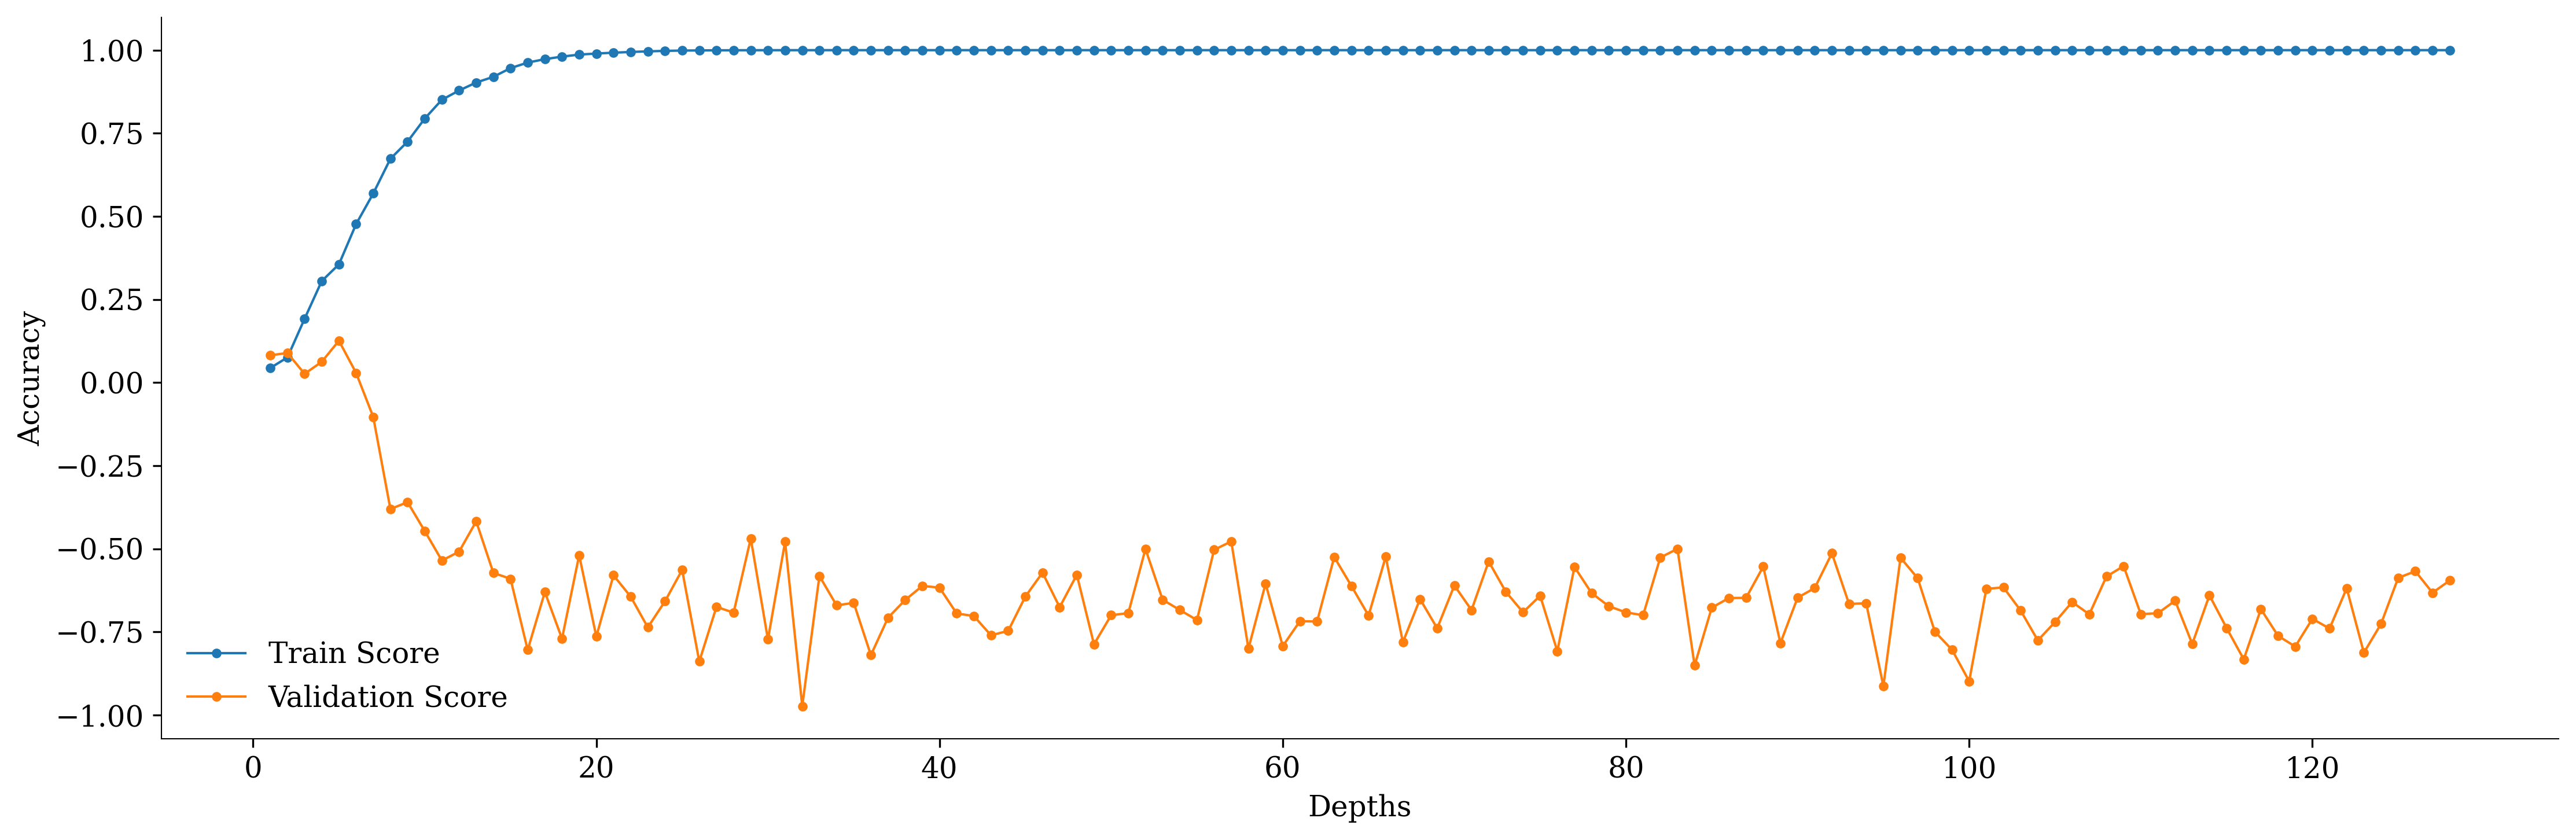

In [163]:
model_utils.PlotTrainTest(depths, 'Depths', train_scores, validation_scores, validation=True)

In [164]:
optimum_depth = depths[np.argmax(validation_scores)]
print(f'The highest validation accuracy was achieved with a max depth of {optimum_depth}')

The highest validation accuracy was achieved with a max depth of 5


We can now calculate evaluate the model scores for a Decision Tree Regressor that uses this depth.

In [165]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

linreg_utils.ScoreModel(dt, X_test, y_test)

Model Evaluation
R-squared: -0.23888039439888753
RMSE:      305835315.9391441
MAE:       3064.9247396027595


Despite the relatively high validation score, the model with a `max_depth` of 5 performed poorly. We could run a grid search on this model, hoping to improve the outcome, however this seems somewhat gratuitous and unproductive. Rather, we could narrow the scope of our regression model, such that it aims to be a better predictor of smaller fires rather than all the fires in the data set.

In [166]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from tempfile import mkdtemp

# # Create cache
# cachedir = mkdtemp()

# # Create estimators
# estimators = [('model', DecisionTreeRegressor())]

# # Create pipeline
# pipe = Pipeline(estimators)

# # Different parameters to test
# param_grid = [
#     {
#         'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#         'model__splitter': ['best', 'random'],
#         'model__max_depth': [i for i in range(1, 11)],
#         'model__min_samples_split': [i for i in range(1, 21, 2)],
#         'model__min_samples_leaf': [i for i in range(1, 11)],
#         'model__max_features': ['auto', 'sqrt', 'log2']
#     }
# ]

# grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)
# fitted_grid = grid.fit(X_train, y_train)

## Reframing

So far we have tried to build a regression model that tries to determine fire size for a wide variety of fires. This obviously is a difficult task when the fire size of a wildfire ranges as much as it does in this data set. What we can therefore do is focus purely on the fires that fall within the classes A-D.

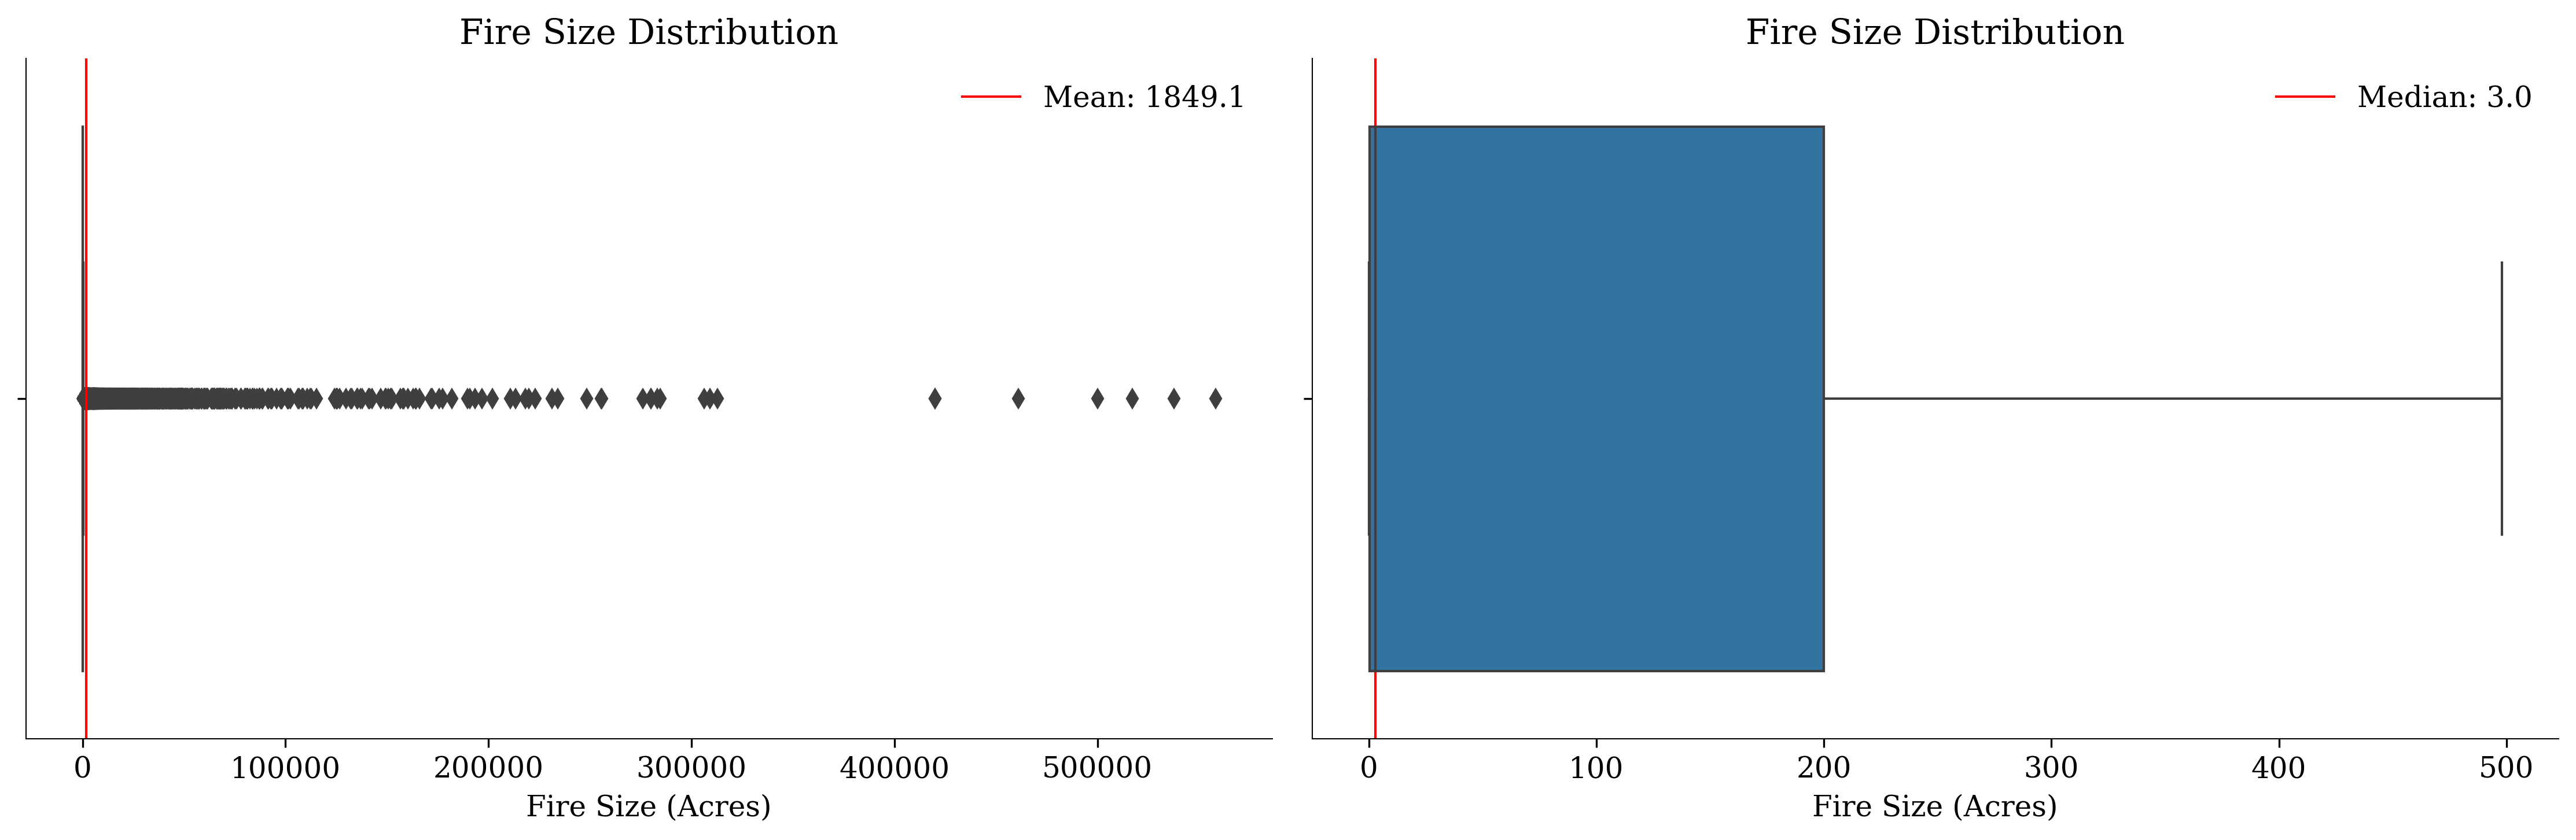

In [168]:
utils.PlotFireSizeDistribution(df)

Wildfires in class D have an upper bound of 300 acres, meaning that we are able to get a decent proportion of values. Let us begin by removing the other classes from the DataFrame, from which we can then build a Linear Regression model.

In [176]:
import eda_utils

classes = ['A', 'B', 'C', 'D']

aDdf = df[df['FIRE_SIZE_CLASS'].isin(classes)]

eda_utils.BasicEda(aDdf, 'Wildfires [Classes A-D]', components=['shape', 'columns', 'dtypes'])

WILDFIRES [CLASSES A-D]
-----------------------

Rows: 23053    Columns: 85

FIRE_YEAR            int64
DISCOVERY_DOY        int64
FIRE_SIZE          float64
FIRE_SIZE_CLASS     object
LATITUDE           float64
                    ...   
state_VT             uint8
state_WA             uint8
state_WI             uint8
state_WV             uint8
state_WY             uint8
Length: 85, dtype: object

Number of categorical columns: 1
Number of numeric columns: 84


In [178]:
X = aDdf.drop(['FIRE_SIZE', 'FIRE_SIZE_CLASS'], axis=1)
y = aDdf['FIRE_SIZE']

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_rem_transformed = column_transformer.fit_transform(X_rem)
X_test_transformed = column_transformer.fit(X_test)

ad_linreg = LinearRegression()
ad_linreg.fit(X_rem, y_rem)

linreg_utils.ScoreModel(ad_linreg, X_test, y_test)

Model Evaluation
R-squared: 0.07640297095063753
RMSE:      2818.104559566449
MAE:       32.031802596890905


Immediately, we see that the MAE and RMSE values are far lower than in previous models. Perhaps now it would be useful to conduct some sort of feature engineering to determine which features are the most important when predicting smaller wildfires. We can also determine good predictors of fire size by looking at the coefficients for the model we have just created.

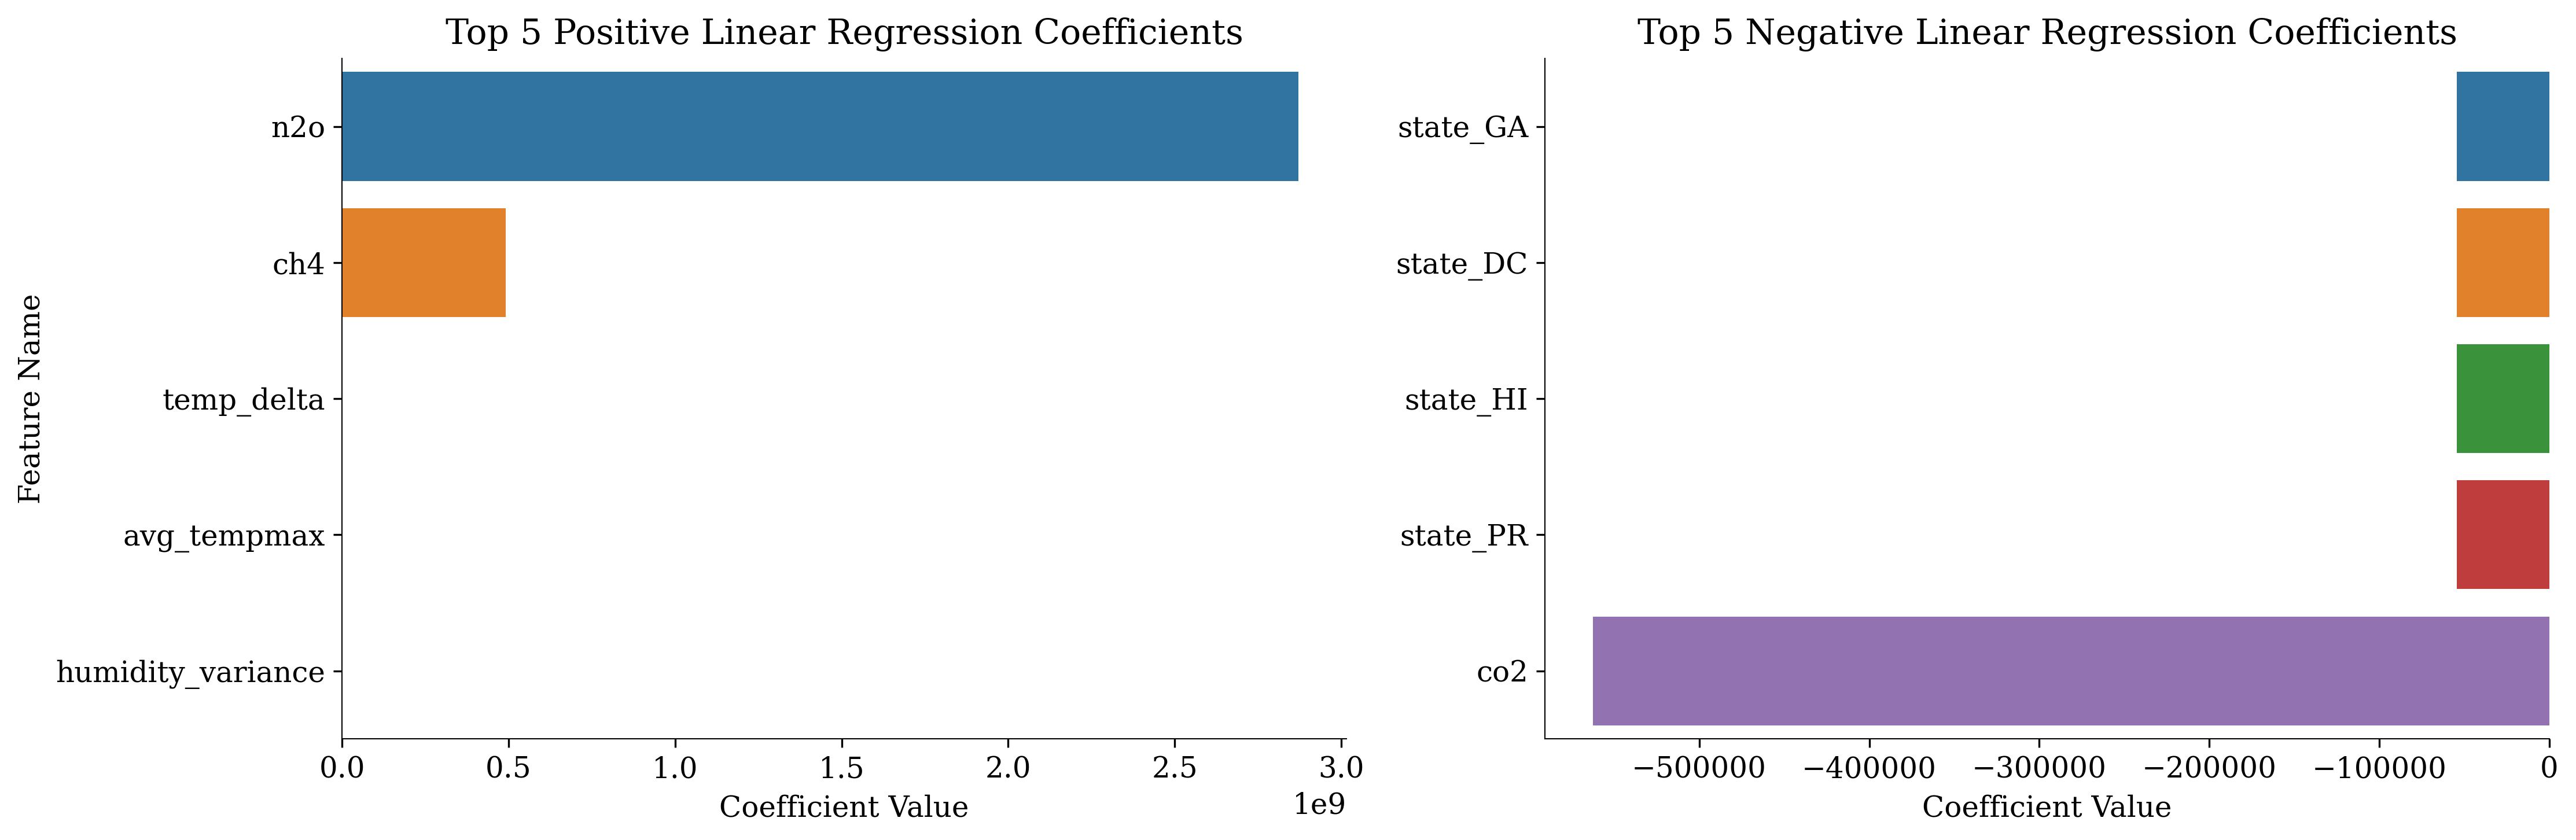

In [179]:
model_utils.PlotCoefficients(ad_linreg, X)

We see that the emissions data plays an important role in determining fire size. If we were to focus on solely these variables then we would perhaps be able to create an even more reliable model.

In [182]:
from sklearn.preprocessing import RobustScaler

X = aDdf[['n2o', 'ch4', 'co2']]
y = aDdf['FIRE_SIZE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate robust scaler
r_scaler = RobustScaler()

# Fit and transform
X_train_robust = r_scaler.fit_transform(X_train)
X_test_robust = r_scaler.transform(X_test)

# Instantiate model
linreg = LinearRegression()
linreg.fit(X_train_robust, y_train)

linreg_utils.ScoreModel(linreg, X_test_robust, y_test)

Model Evaluation
R-squared: 0.0009220918744855533
RMSE:      3048.4138858139886
MAE:       34.79642260404277


### Lasso

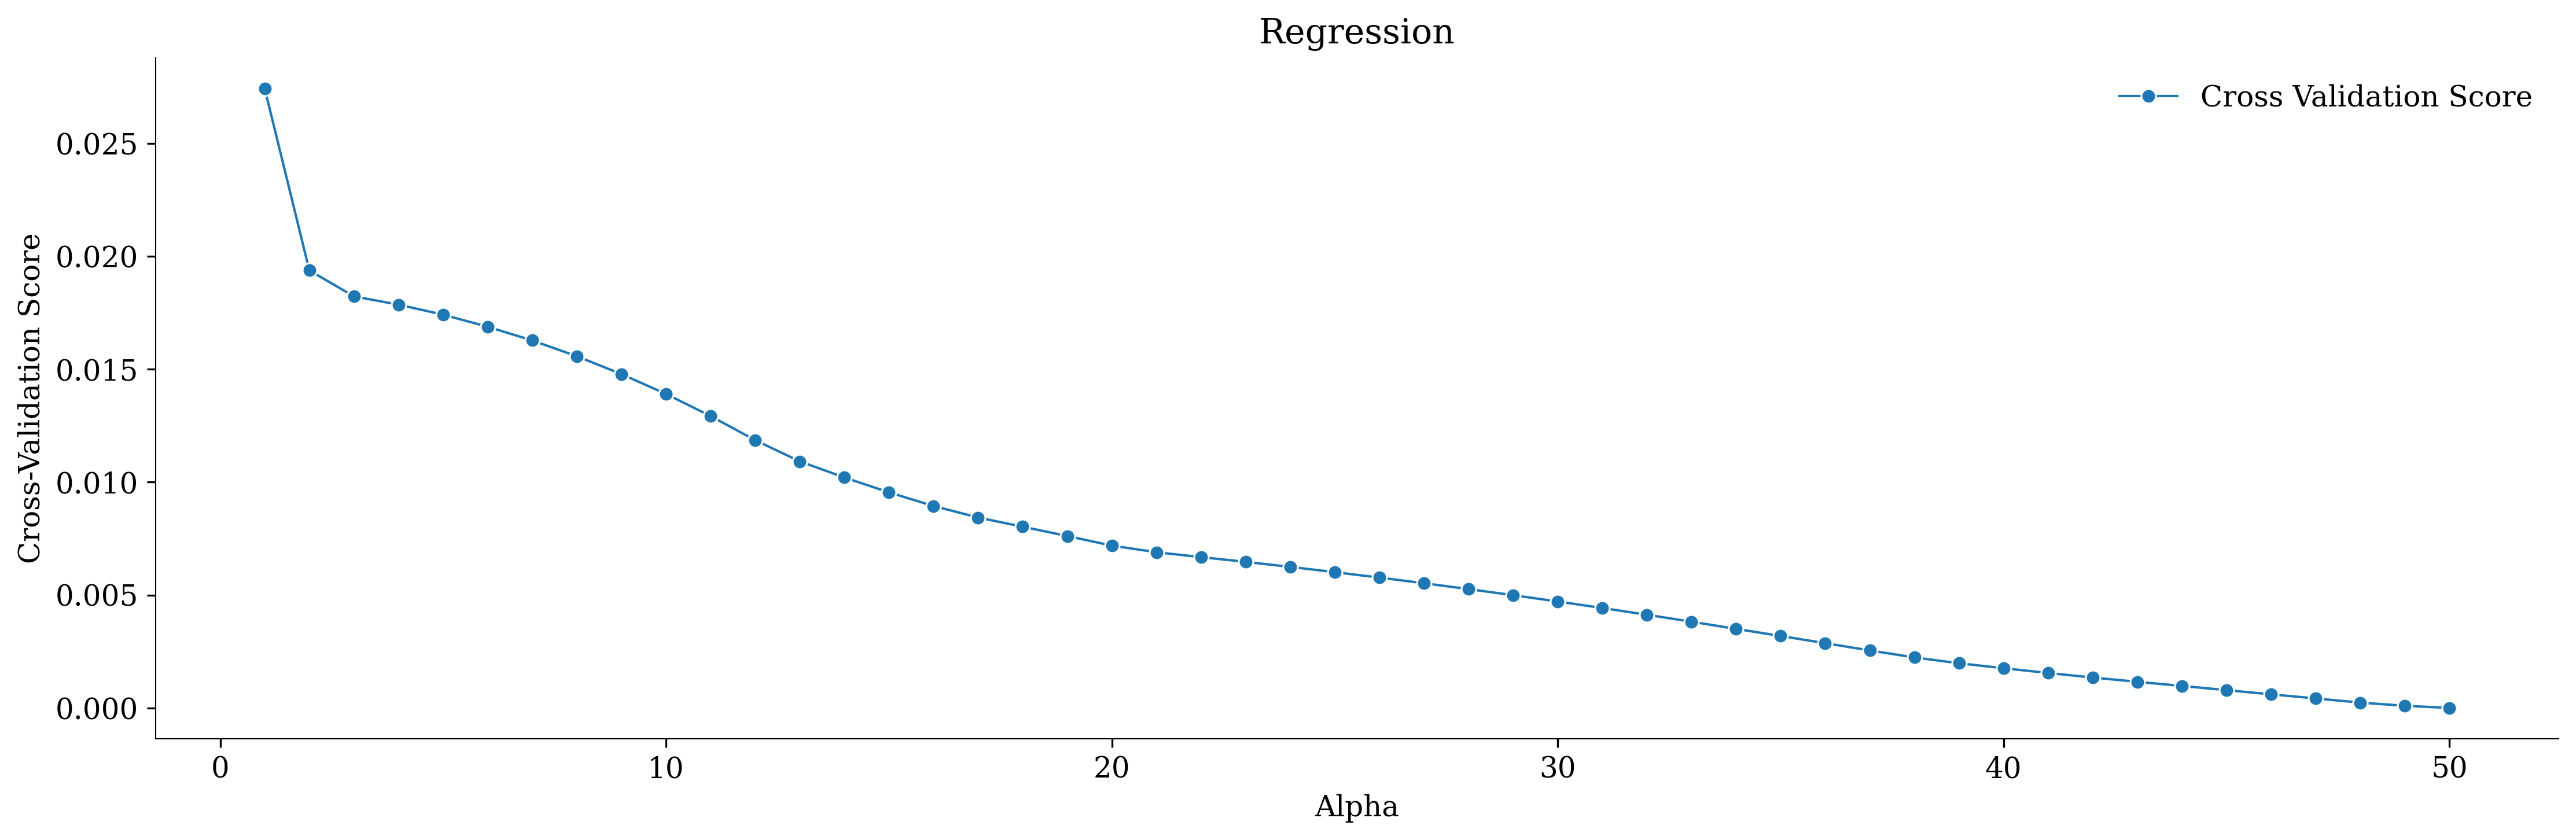

In [185]:
X = aDdf.drop(['FIRE_SIZE', 'FIRE_SIZE_CLASS'], axis=1)
y = aDdf['FIRE_SIZE']

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

linreg_utils.PlotAlphaRegression(X_rem, y_rem, Lasso, list(range(1, 51)))

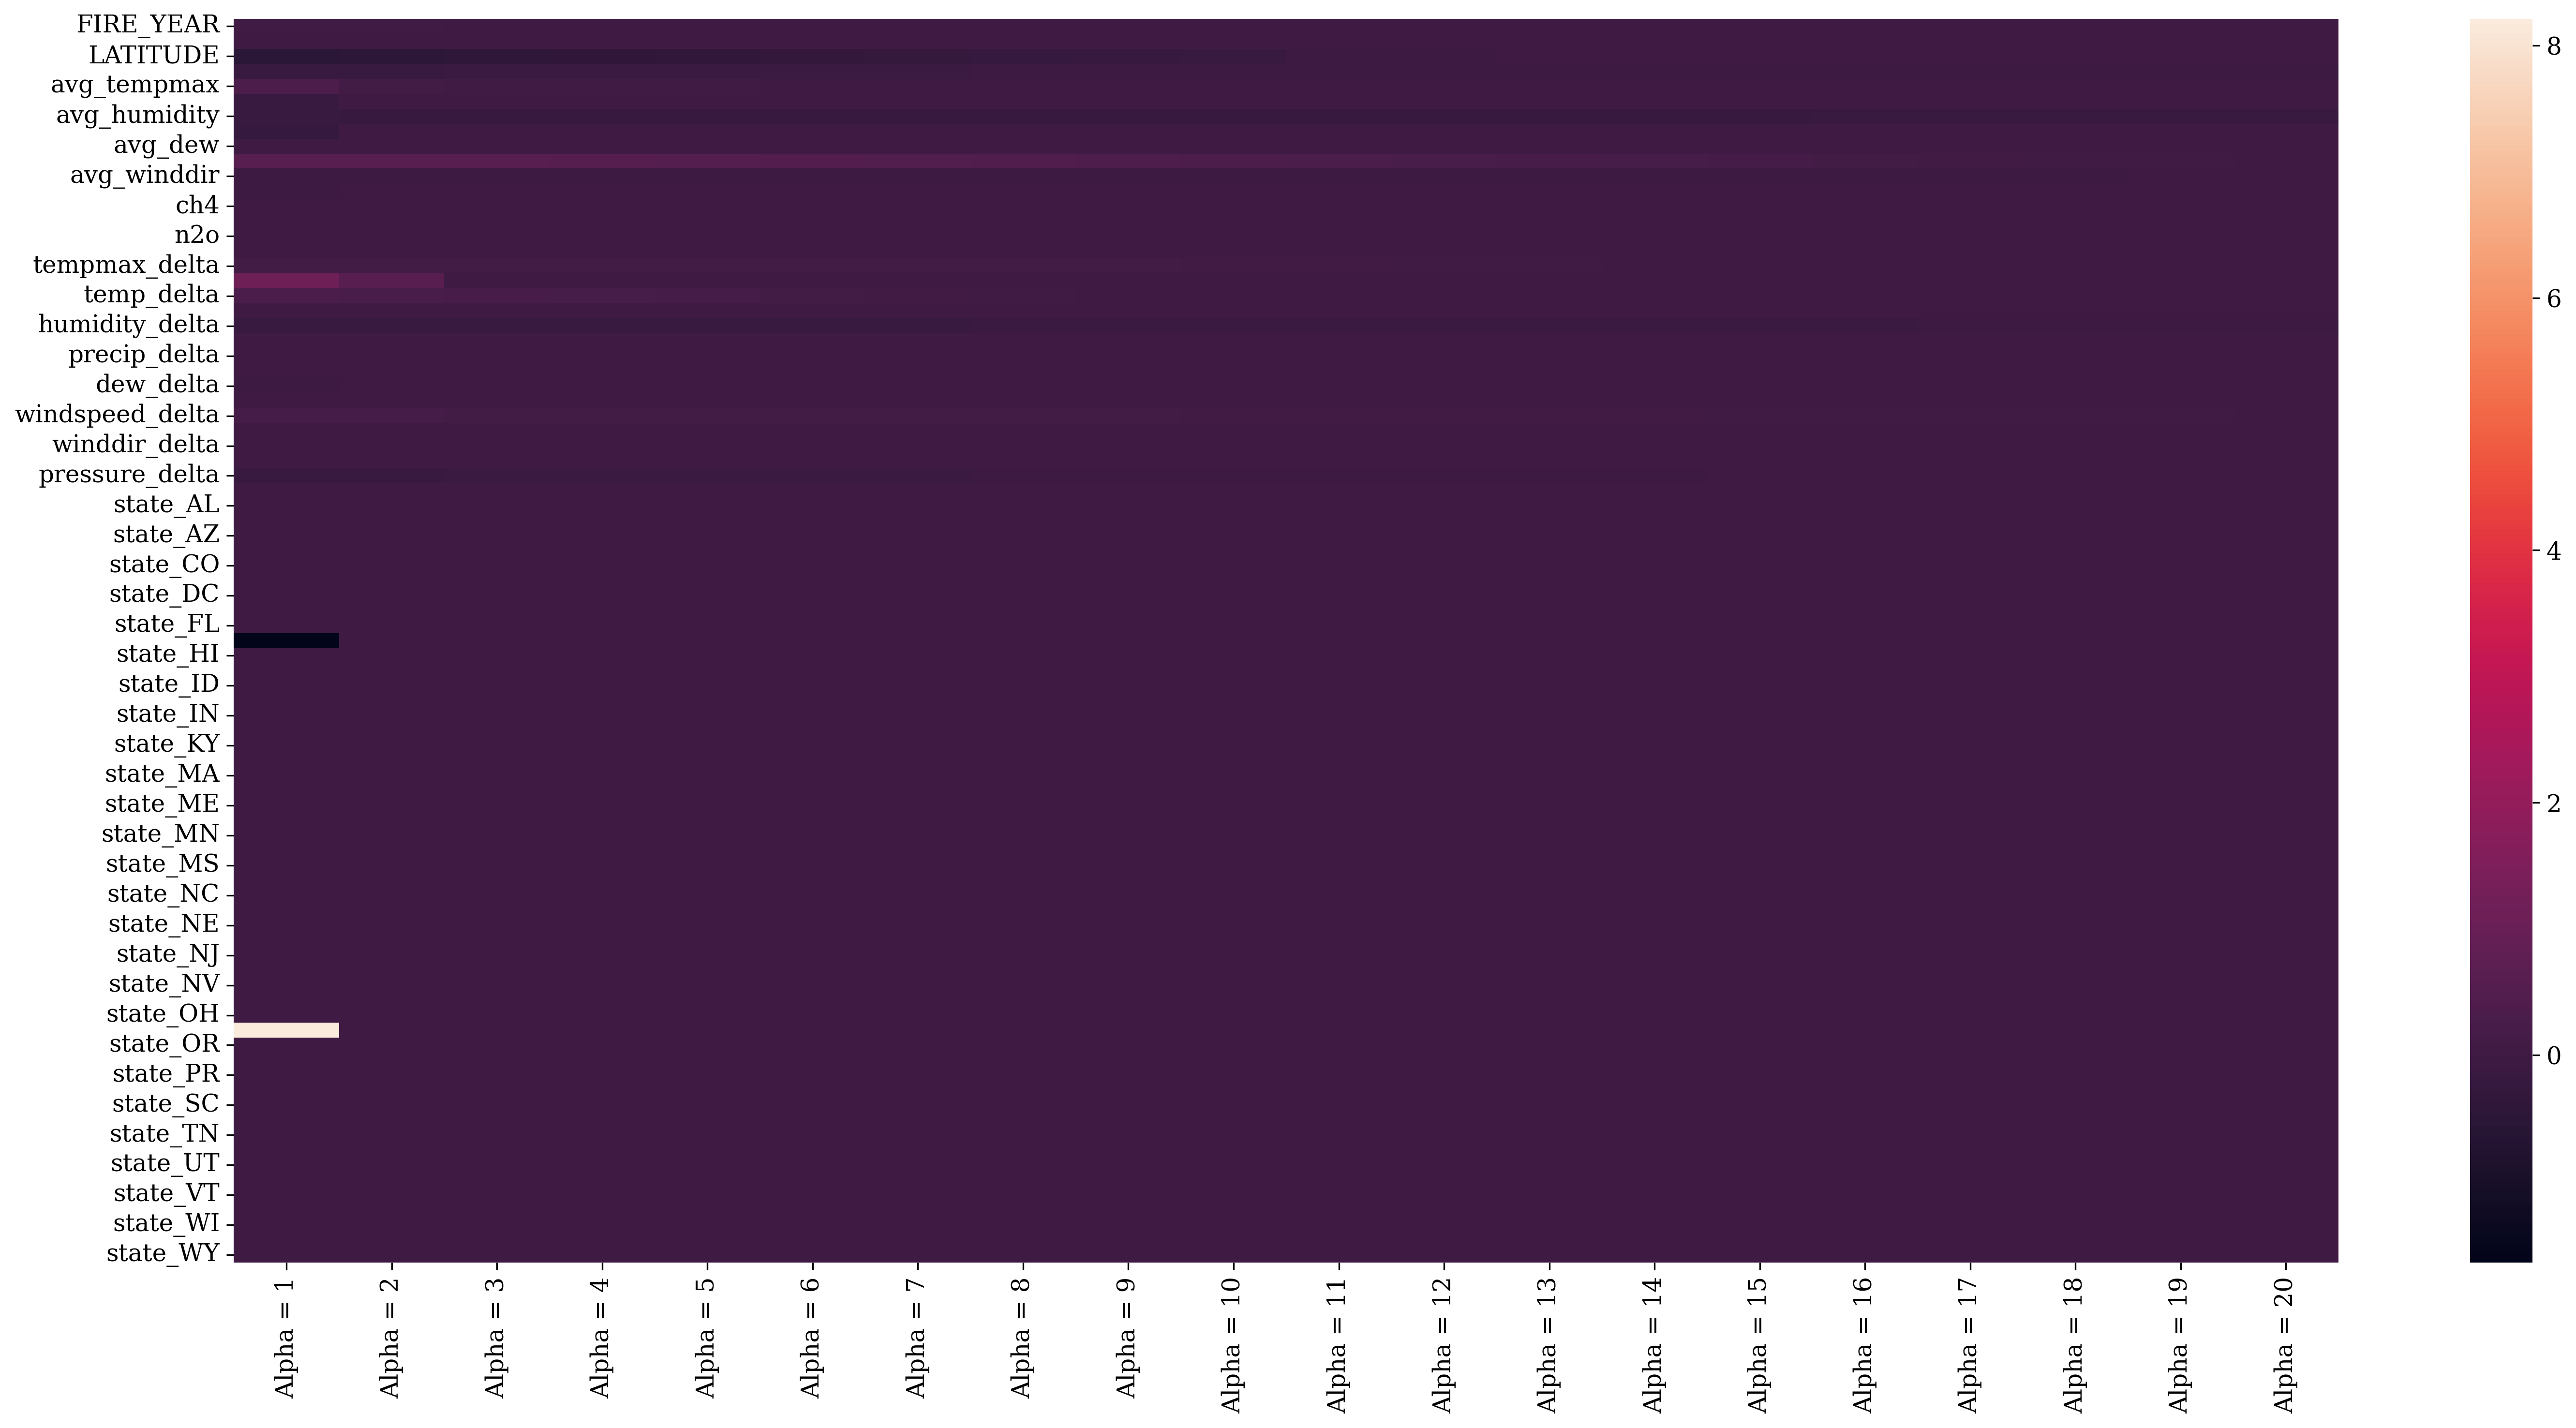

In [195]:
linreg_utils.PlotAlphaHeatmap(Lasso, X_rem, y_rem, list(range(1, 21)), (20,10))

### Decision Tree Regressor

In [198]:
X = aDdf.drop(['FIRE_SIZE', 'FIRE_SIZE_CLASS'], axis=1)
y = aDdf['FIRE_SIZE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

linreg_utils.ScoreModel(dt, X_test, y_test)

Model Evaluation
R-squared: -0.746792525030211
RMSE:      5329.8612106526525
MAE:       35.29289120436638
